<a href="https://colab.research.google.com/github/brunopiruka/neurocientista.com.br/blob/master/Detec%C3%A7%C3%A3o_de_Fraudes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Neurocientista.com.br](https://raw.githubusercontent.com/brunopiruka/neurocientista.com.br/master/dataset/logo.png)

*por [Bruno_Piruka](https://neurocientista.com.br/)*


---

# Detecção de Fraudes em Cartões de Crédito

Cada vez mais é comum as pessoas acumularem cartões e mais cartões de crédito, muitas vezes eles nem existem "fisicamente", apenas virtualmente em celulares, relógios, pulseiras, etc.

A emissão já não é mais exclusiva dos grandes bancos, desde *fintechs* até lojas de departamento possuem autonomia para emitir e gerir seus cartões.

![alt text](https://image.freepik.com/vetores-gratis/ilustracao-do-conceito-de-carteira_114360-1558.jpg)

Desta forma, é esperado também que o número de fraudes envolvendo cartões aumente proporcionalmente, tal como a preocupação em evitá-las.

Com base nesse cenário, uma janela de oportunidade se abre para a Ciência de Dados - lidar com um volume colossal de transações financeiras evitando aquelas que sejam fraudelentas.

A melhor formar para isso é utilizar da Inteligência Artificial, treinando modelos com base nas informações anteriores, para prever ações e transações futuras.

Com isso, protegendo todas as esferas envolvidas; consumidor, fornecedor, "bandeira" e instituição emissora.


# Obtenção dos Dados

Os dados utilizados para o projeto foram consolidados a partir de operadoras de crédito europeias e disponibilizados anonimamente* - as colunas não apresentam idenficação, cotém apenas os rótulos $V1,V2,V3...\space \space V28$, assim por diante - para descaracterizar os valores, sem perder o teor estatístico, foi realizada uma transformação utilizando Análise de Componentes Principais *(Principal Component Analysis - **PCA**)*

Representam as transações realizadas do decorrer de 2 dias durante o mês de Setembro de 2013. Dessas transações 492 foram fraudes, dentre as 284.807 totais.

A primeira informação relevante que já tiramos nessa primeira análise, é que a base de dados é extremamente desbalanceada, ou seja, um número muito pequeno - cerca de $0,173\%$ - representam de fato fraudes.

<img src="https://image.freepik.com/vetores-gratis/ilustracao-de-pagamento-on-line-com-cartao-de-credito_53876-8120.jpg" width="40%">

---
*A página que serviu como base pode ser consultada pelo Link: [https://www.kaggle.com/mlg-ulb/creditcardfraud](https://www.kaggle.com/mlg-ulb/creditcardfraud)





#Importando os Dados

Vamos utilizar o arquivo disponibilizado, `credicard.csv`, uma cópia foi disponibilizada no [link](https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1)







In [125]:
# Importando bibliotecas necessárias

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


In [19]:
# Importanto os dados para um dataframe

dados = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"
df = pd.read_csv(dados)



## Análise Prévias dos Dados

Com o intuito de conhecer melhor nossa base de dados, iniciaremos explorando as variáveis e seu resumo estatístico

* Vizualizando as primeiras entradas

In [20]:
#Visualizando as primeiras entradas
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Percebe-se aqui que as únicas colunas "caracterizadas" são as colunas `Time`, `Amount` e `Class`, sendo a última nossa variável alvo, que será usada da seguinte forma:

* **0**: Operação Normal
* **1**: Operação fraudelenta 

In [21]:
# Resumo Estatístico

df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


* Buscando dados ausentes


In [22]:
#buscando dados ausentes

df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Uma vez que não existem dados faltantes, não haverá necessidade de realizar uma "limpeza" nas entradas nulas

Tendo em vista que já percebemo que o dataset é muito desbalanceado, onde apenas 0,173% representa operações fraudulentas, vamos ilustrar graficamente esse ponto:

In [23]:
# Chamando as entradas
print(df.Class.value_counts())
print('\n{:.3f}% das entradas representam fraudes'.format(df[df.Class == 1].shape[0]/df.shape[0] * 100))

0    284315
1       492
Name: Class, dtype: int64

0.173% das entradas representam fraudes


[]

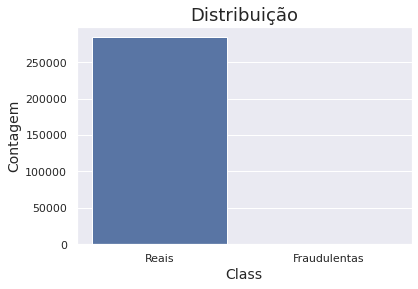

In [47]:
# Visualizando em Gráfico

fig, ax = plt.subplots()
sns.countplot('Class', data=df, ax=ax)
ax.set_xlabel('Class', size='14')
ax.set_ylabel('Contagem', size='14')
ax.set_title('Distribuição', size='18')

plt.xticks([0,1],['Reais','Fraudulentas'])

plt.plot()

Apenas como forma de ilustrar outras possibilidades exploratórias, iremos plotar os histrogramas para as variáveis `Time` e `Amount`

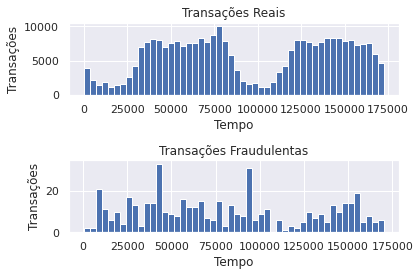

In [37]:
# Plotando o Histograma para a variável Time

fig, ax = plt.subplots(nrows=2, ncols=1)

ax[0].hist(df.Time[df.Class == 0], bins=50)
ax[0].set_title('Transações Reais')
ax[0].set_xlabel('Tempo')
ax[0].set_ylabel('Transações')

ax[1].hist(df.Time[df.Class == 1], bins=50)
ax[1].set_title('Transações Fraudulentas')
ax[1].set_xlabel('Tempo')
ax[1].set_ylabel('Transações')

plt.tight_layout()

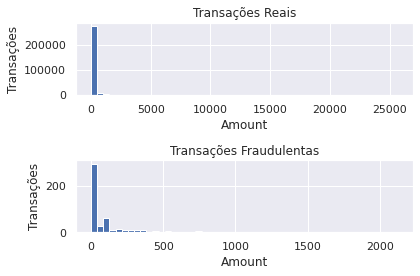

In [40]:
# Plotando o Histograma para a variável Amount

fig, ax = plt.subplots(nrows=2, ncols=1)

ax[0].hist(df.Amount[df.Class == 0], bins=50)
ax[0].set_title('Transações Reais')
ax[0].set_xlabel('Amount')
ax[0].set_ylabel('Transações')

ax[1].hist(df.Amount[df.Class == 1], bins=50)
ax[1].set_title('Transações Fraudulentas')
ax[1].set_xlabel('Amount')
ax[1].set_ylabel('Transações')

plt.tight_layout()

Outra forma possível de análise é com base em um *boxplot* que permita verficar se existem padrões distintos entre as operações reais e as fraudulentas

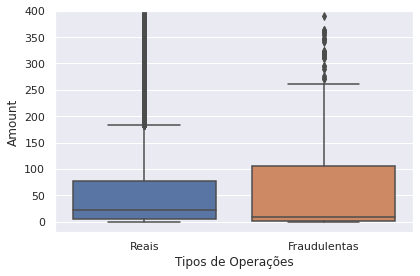

In [48]:
#Plotando o boxplot para a variável Amount em relação a Class
fig, ax = plt.subplots()

sns.boxplot(df.Class, df.Amount, ax=ax)
plt.ylim(-20,400)
plt.xticks([0,1],['Reais','Fraudulentas'])
plt.xlabel('Tipos de Operações')

plt.tight_layout()

Antes de prosseguirmos com o balanceamento dos dados, vamos plotar uma matriz de correlação para visualizar a configuração atual de nosso dataset

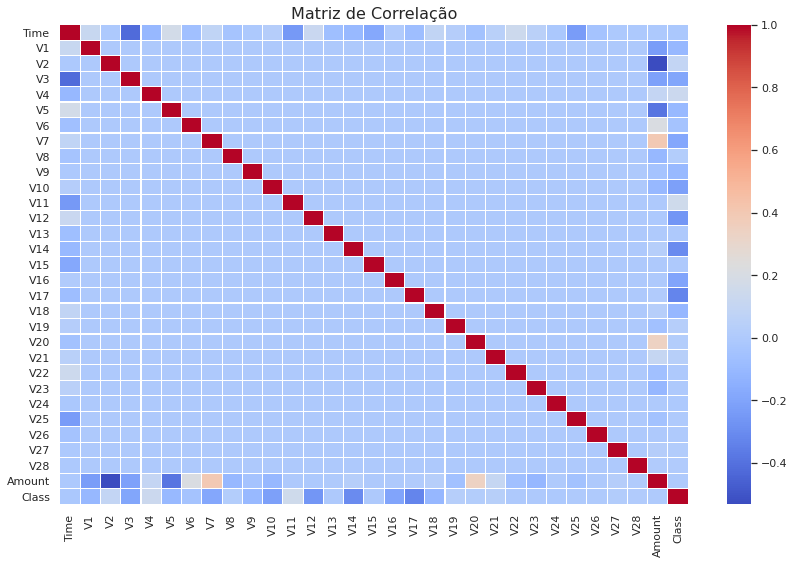

In [122]:
#Plotando uma Matriz de Correlação

corr = df.corr()

fig, ax = plt.subplots(figsize = (12,8))
ax.set_title('Matriz de Correlação', size='16')

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=.1, cmap='coolwarm', ax=ax)

plt.tight_layout()


#Preparando os Dados

Antes de prossegir para a construção do modelo de *Machine Learning*, devemos normalizar os dados, que ainda não foram pré-processados (`Time`e `Amount`), dividir o conjunto de dados entre um set de treino e um set de teste e, por fim, balancear o conjunto de dados

In [75]:
#Normalizando os Dados

df_std = df.copy()

std_scaler = StandardScaler()
df_std['std_amount'] = std_scaler.fit_transform(df_std['Amount'].values.reshape(-1,1))
df_std['std_time'] = std_scaler.fit_transform(df_std['Time'].values.reshape(-1,1))

df_std.drop(['Amount','Time'], axis=1, inplace=True)

#Verificar a alteração
df_std.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,std_amount,std_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


Antes de realizar o balanceamento, iremos dividir nosso conjunto de dados nos grupos de Treino e Teste, para estratificar de forma proporcional usaremos o parametro `stratify`

In [77]:
#Definindo as variáveis X e y
X = df_std.drop('Class', axis=1)
y = df_std['Class']

#Dividindo o conjunto entre Treino e Test
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, shuffle=True)

Para balancear os dados deveremos escolher entre utilizar *Under-sampling* ou *Over-sampling*, ou seja, "descartar" dados da classe majoritáia ou "replicar" dados da classe minoritária. Para esse exemplo, utilizaremos o *Under-sampling*, uma vez que a classe minoritária é muitas vezes menor que a majoritária, dessa forma, será melhor preservada. Utilizaremos o `RandomUnderSampler` da biblioteca `imblearn`

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Quantidade de dados em cada classe:
 1    369
0    369
dtype: int64


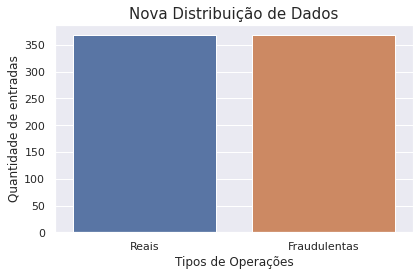

In [106]:
#Importando o RandomUnderSampler
from imblearn.under_sampling import RandomUnderSampler

#Balanceando os Dados
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_sample(X_train, y_train)

#Conferir o balanceamento
print('Quantidade de dados em cada classe:\n',pd.Series(y_rus).value_counts())

#plotar a nova distribuição 
sns.countplot(y_rus)
plt.xticks([0,1],['Reais', 'Fraudulentas'])
plt.xlabel('Tipos de Operações')
plt.ylabel('Quantidade de entradas')
plt.title('Nova Distribuição de Dados', size='15')
plt.tight_layout();

Uma vez balanceado os dados, podemos comparar a matriz de correlação antes e após o balanceamento. Dessa forma, encontrar quais variáveis possuem "maior peso" para o funcionamento do sistema preditivo

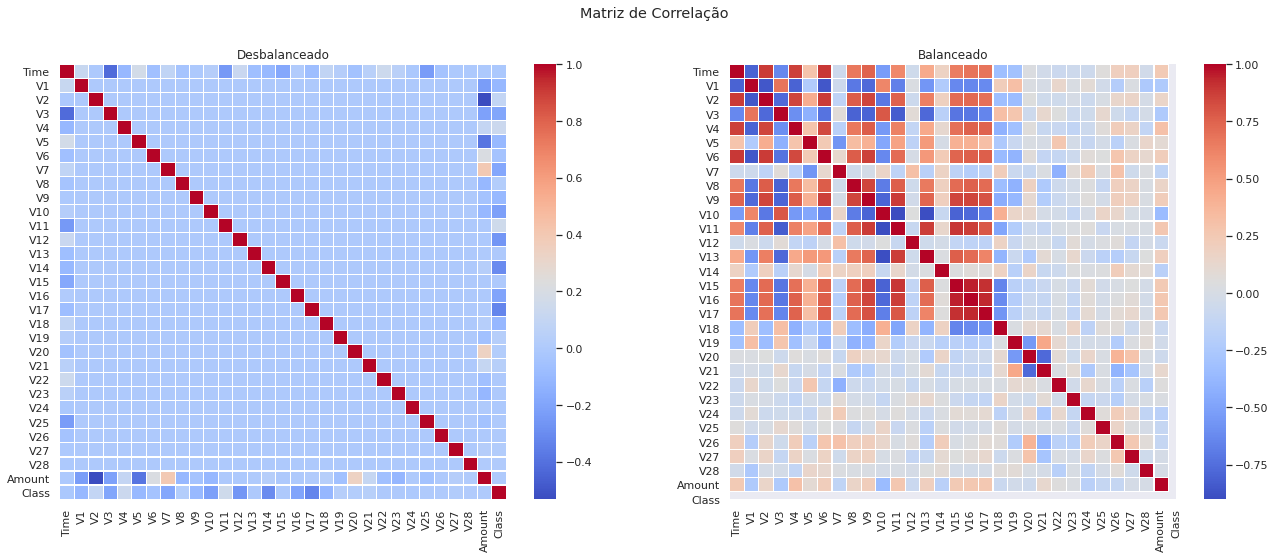

In [108]:
# plotar a matriz de correlação
corr_rus = pd.DataFrame(X_rus).corr()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (22,8))
fig.suptitle('Matriz de Correlação')

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="coolwarm", ax=ax[0])
ax[0].set_title('Desbalanceado')

sns.heatmap(corr_rus, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="coolwarm", ax=ax[1])
ax[1].set_title('Balanceado')

plt.show()

#Construindo o modelo de *Machine Learning*

Agora, já com todos os dados devidamente preparados, poderemos construir nosso sistema que irá prever uma possível fraude. Para tal, utilizaremos o método da Regressão Logística.
Lembrando que devemos utilizar os dados balanceados para o treinamento - `X_rus`e `y_rus`, respectivamente.

In [130]:
#Contruindo e treinando nosso modelo, utilizando Regressão Logistica

model = LogisticRegression()
model.fit(X_rus,y_rus)

#Realizar as previsões utilizando os dados de teste
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

Uma vez o modelo treinado e com as previsões realizadas, podemos passar à avaliação do desempenho do modelo.

Lembrando que nosso interesse é na detecção de fraudes, uma vez que elas ocorrem em um número muito baixo, a acurácia não necessariamente será a melhor métrica de avaliação. Devemos, portanto, focar na taxa de acertos das fraudes reais - verdadeiros positivos - e não na taxa "global" de acertos - que inclui os verdadeiros negativos.

Nossa avaliação iniciará utilizando o Relatório de Classificação e a Matriz de Confusão.

In [127]:
# Plotando a matriz de confusão
# instalar a biblioteca scikit-plot
!pip install -q scikit-plot

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9999    0.9710    0.9852     71079
           1     0.0520    0.9187    0.0985       123

    accuracy                         0.9710     71202
   macro avg     0.5260    0.9449    0.5419     71202
weighted avg     0.9982    0.9710    0.9837     71202

Acurácia: 0.9710

AUC: 0.9449



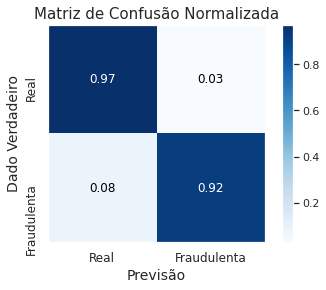

In [142]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.title('Matriz de Confusão Normalizada', size=15)
plt.xlabel('Previsão', size=14)
plt.xticks([0,1],['Real','Fraudulenta'])
plt.yticks([0,1],['Real','Fraudulenta'], rotation=90)
plt.ylabel('Dado Verdadeiro', size=14)
# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred, digits=4))

# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred)))

# imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))

#Conclusões

Nesse exemplo que acabamos de ilustrar, foi possível demonstrar o poder de "criar" inteligência quando temos uma base de dados bem estruturada e trabalhamos com suas entradas de forma a alimentar nosso modelo.

Foi necessário um esforço adicional decorrente da normalização e balanceamento dos dados, porém, o resultado, já nessa primeira aplicação, se mostrou bastante promissor.

Lembrando sempre que devemos considerar também outras abordagens e ajustes de parâmetros, podendo, dessa forma, levar a um refinamento ainda maior do projeto.
